- Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\Clon Github\\Data-Science\\Data-sources\\tips.csv', sep=',', encoding='utf-8')
#tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#exploraremos el dataset

tips.shape

(244, 7)

In [4]:
"""viendo la info, ya nos damos cuenta de que no hay null values, puesto que coincide la cuenta de observaciones total con 
la cantidad de observaciones por columna/variable. Asimismo, parece ser que habrá que modificar el tipo de dato de algunas
variables como smoker, sex, day, etc. a categórico para poder hacer plots"""

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
#como sospechábamos, las variables sex, smoker, day y time presentan valores que se pueden categorizar

print(tips.sex.unique())
print(tips.smoker.unique())
print(tips.day.unique())
print(tips.time.unique())

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


In [6]:
tips.sex = tips.sex.astype('category')
tips.smoker = tips.smoker.astype('category')
tips.day = tips.day.astype('category')
tips.time = tips.time.astype('category')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
#vamos a añadir algunas columnas que pueden resultar interesantes para nuestra exploración

tips['gasto_persona'] = round(tips['total_bill'] / tips['size'], 2)
tips['pct_tip'] = round((tips['tip']*100)/tips['total_bill'], 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,gasto_persona,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,14.68


In [8]:
tips.describe()

,total_bill,tip,size,gasto_persona,pct_tip
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,7.888197,16.079754
std,8.902412,1.383638,0.951100,2.914234,6.107020
min,3.070000,1.000000,1.000000,2.880000,3.560000
25%,13.347500,2.000000,2.000000,5.800000,12.910000
50%,17.795000,2.900000,2.000000,7.255000,15.475000
75%,24.127500,3.562500,3.000000,9.390000,19.147500
max,50.810000,10.000000,6.000000,20.270000,71.030000


In [9]:
tips.corr()

,total_bill,tip,size,gasto_persona,pct_tip
total_bill,1.000000,0.675734,0.598315,0.647554,-0.338629
tip,0.675734,1.000000,0.489299,0.347405,0.342361
size,0.598315,0.489299,1.000000,-0.175359,-0.142844
gasto_persona,0.647554,0.347405,-0.175359,1.000000,-0.314254
pct_tip,-0.338629,0.342361,-0.142844,-0.314254,1.000000


Una Variable: 1 Numérica = 'tip_pct'

C:\Users\elgab\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_tip', ylabel='Density'>

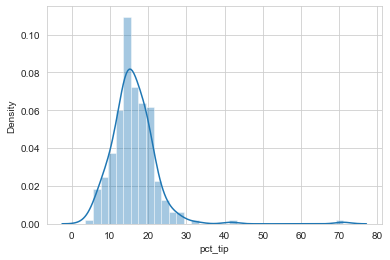

In [10]:
sns.set_style('whitegrid')
sns.distplot(tips.pct_tip)

In [39]:
#moda
tips.pct_tip.value_counts().idxmax()

14.48

Observamos una distribución unimodal cuya moda (14.48% de propina) se encuentra cerca de la media (16.07% de propina), además, la mayoría de las observaciones entran dentro de una desviación estándar (entre 9.93%-22.17% de propina). Cabe prestar atención a los 2 o 3 outliers que aparecen a la derecha de la gráfica y que parecen producir un skew a la izquierda. 

<AxesSubplot:ylabel='pct_tip'>

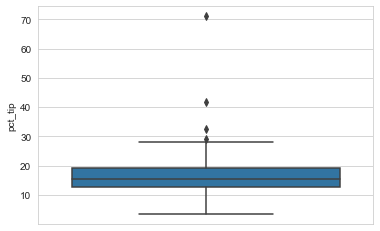

In [40]:
#gracias a este boxplot podemos observar más claramente los outliers
sns.boxplot(y=tips.pct_tip)

C:\Users\elgab\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_tip', ylabel='Density'>

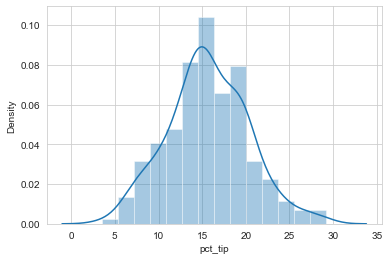

In [11]:
sns.distplot(tips.pct_tip[tips.pct_tip <= 30]) #observamos cómo eran los outliers los que estaban produciendo el skew

Dos Variables: 1 Categórica = 'day', 1 Numérica = 'tip_pct'

<AxesSubplot:xlabel='day', ylabel='pct_tip'>

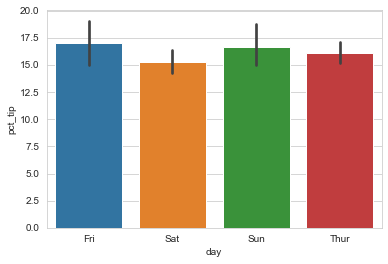

In [44]:
sns.barplot(x='day', y='pct_tip', data=tips) #la media del porcentaje de propinas es más alto los viernes y más bajo los sábados.

<AxesSubplot:xlabel='day', ylabel='pct_tip'>

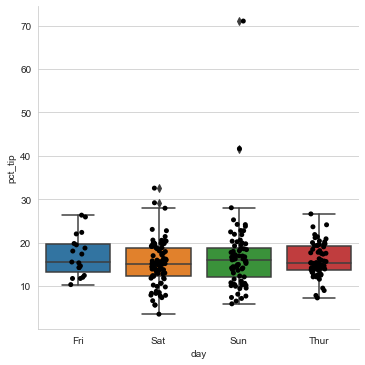

In [63]:
sns.catplot(x='day', y='pct_tip', kind='box', data=tips)
sns.stripplot(x='day', y='pct_tip', data=tips, color='black')


<AxesSubplot:xlabel='pct_tip', ylabel='Density'>

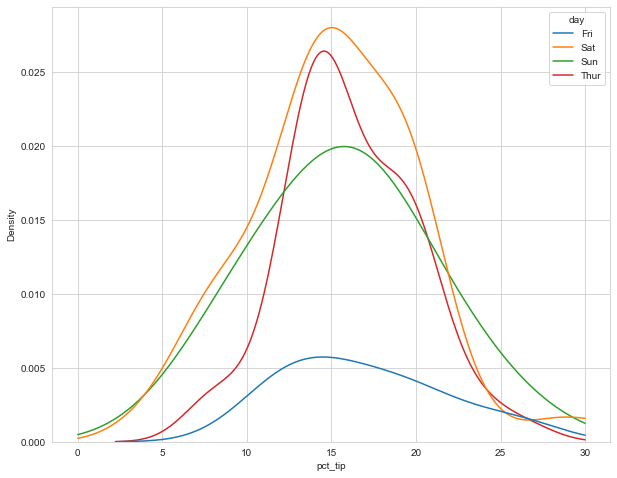

In [49]:
#una comparativa de densidades nos muestra que el porcentaje de observaciones en viernes es mucho más bajo que el resto de días.
#Podríamos lanzar la hipótesis de que los pocos clientes de los viernes están mucho más fidelizados, mientras que 
#los clientes de los sábados, al ser el día en que más gente asiste al restaurante y en el que podríamos encontrar una mayor cantidad
#de clientes poco habituales, dejan un porcentaje menor de propina debido a este motivo

plt.figure(figsize=(10,8))
sns.kdeplot('pct_tip', data=tips, hue='day', thresh=1, clip=(0, 30))



<AxesSubplot:xlabel='day', ylabel='count'>

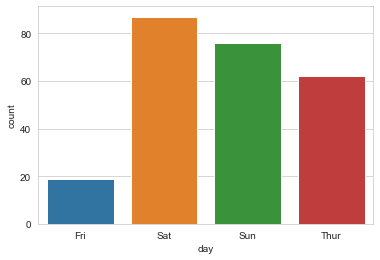

In [67]:
sns.countplot(x='day', data=tips)

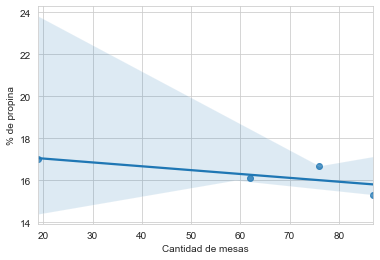

In [97]:
#investigaremos si existe algun tipo de relación entre la cantidad de mesas/día y el porcentaje de propinas
#mirando la gráfica, no parece posible sacar una conclusión al respecto

count_day = tips.groupby(['day']).count()['pct_tip']
pct_day = tips.groupby(['day']).mean()['pct_tip']

sns.regplot(x=count_day, y=pct_day)
plt.xlabel('Cantidad de mesas')
plt.ylabel('% de propina')
plt.show()

Tres Variables : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'

<AxesSubplot:xlabel='day', ylabel='pct_tip'>

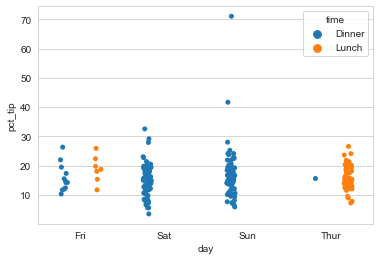

In [98]:
#Observamos que el dato observado en sábado y domingo corresponde a la cena, en jueves a la comida y en viernes a partes iguales

sns.stripplot(x='day', y='pct_tip', data=tips, jitter=True, hue='time', dodge=True)

Text(0.5, 1.0, 'Comparativa comidas/cenas en Viernes')

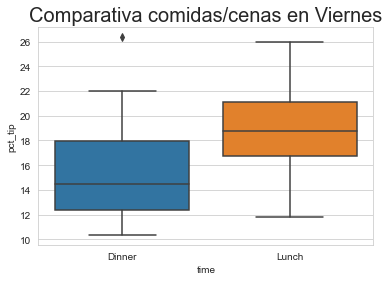

In [111]:
#Viernes: a rasgos generales, el porcentaje de propina es más alto a la hora de la comida que en la cena, 
#aunque presenta una poco más de dispersión el dato de las comidas

viernes = tips[tips['day']=='Fri']

sns.boxplot(x='time', y='pct_tip', data=viernes)
plt.title('Comparativa comidas/cenas en Viernes', fontdict={'size':20})

Cuatro Variables : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'

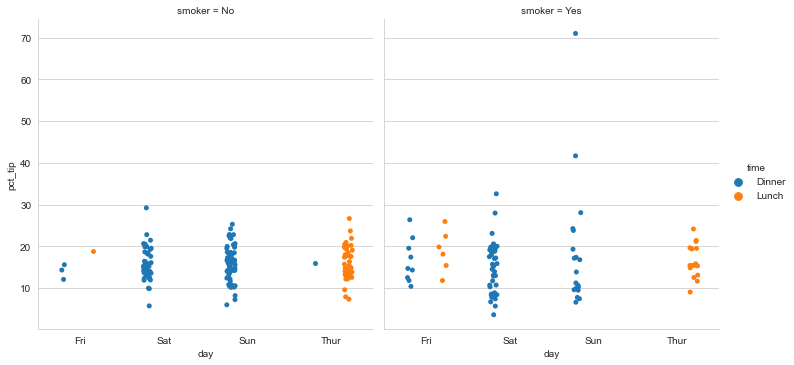

In [144]:
#observamos que en la mayoría de mesas del viernes hay algún fumador, sin gran distinción entre comida y cena

sns.catplot(x="day", y="pct_tip", hue="time", col="smoker", data=tips, kind="strip", dodge=True)

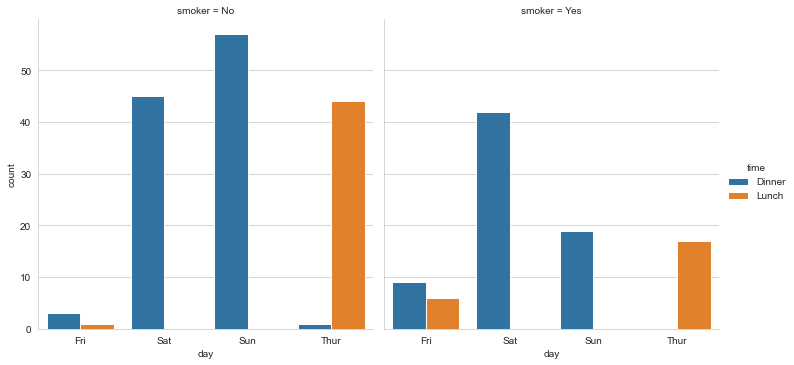

In [129]:
#observamos una mayor cantidad de mesas sin fumadores en domingo y jueves
#el sábado es más o menos equivalente fumadores/no fumadores
#la hora de la comida no parece tener relación alguna con fumador/no fumador

sns.catplot(x="day", hue="time", col="smoker", data=tips, kind="count", dodge=True)

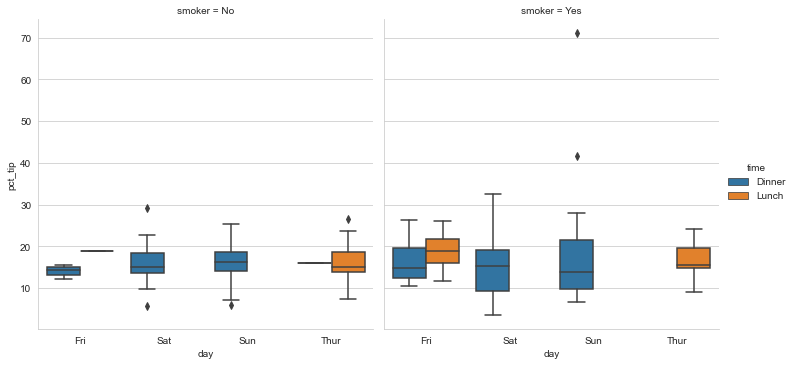

In [128]:
#no parece que fumador o no afecte al porcentaje de propina de forma llamativa

sns.catplot(x="day", y="pct_tip", hue="time", col="smoker", data=tips, kind="box", dodge=True)

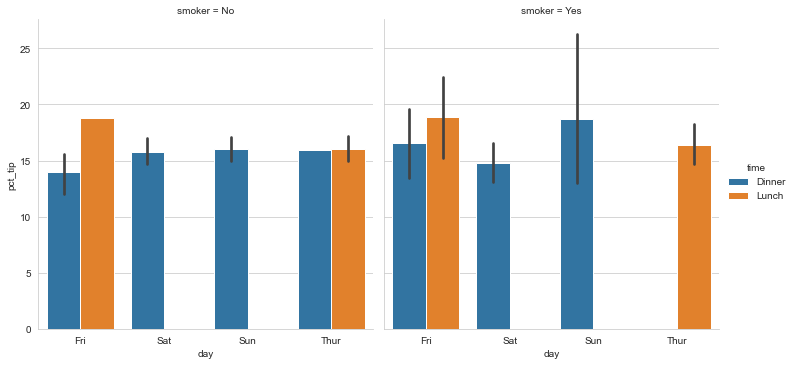

In [141]:
#podemos observar a continuación cómo la influencia es mínima sobre la media:

sns.catplot(x='day', y='pct_tip', data=tips, hue='time', col='smoker', kind='bar')

- Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

- Exercici 3
Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.api.types import CategoricalDtype

movies = pd.read_table('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\Clon Github\\Data-Science\\Pre-processing-data\\movies.dat', sep='::', engine='python', header=None)
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
mov_df = movies.copy(deep=True)
mov_df.drop(labels=0, axis=1, inplace=True)
mov_df.head()

,1,2
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


In [3]:
mov_df.columns = ['Movie', 'Genre'] 
mov_df.head()

,Movie,Genre
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


Separaremos las fechas de las películas.

In [4]:
mov_df['Date'] = mov_df.Movie.str.extract(r'(\(\d\d\d\d\))')
mov_df.head()

,Movie,Genre,Date
0,Toy Story (1995),Animation|Children's|Comedy,(1995)
1,Jumanji (1995),Adventure|Children's|Fantasy,(1995)
2,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,Waiting to Exhale (1995),Comedy|Drama,(1995)
4,Father of the Bride Part II (1995),Comedy,(1995)


In [5]:
mov_df.Movie = mov_df.Movie.str.replace('\(\d\d\d\d\)', '')
mov_df.Date = mov_df.Date.str.replace('\(|\)', '')
mov_df[::101]

,Movie,Genre,Date
0,Toy Story,Animation|Children's|Comedy,1995
101,Unforgettable,Thriller,1996
202,Under Siege 2: Dark Territory,Action,1995
303,Three Colors: Red,Drama,1994
404,8 Seconds,Drama,1994
505,"Piano, The",Drama|Romance,1993
606,Heavy Metal,Action|Adventure|Animation|Horror|Sci-Fi,1981
707,Switchblade Sisters,Crime,1975
808,Stefano Quantestorie,Comedy|Drama,1993
909,My Favorite Year,Comedy,1982


A continuación, crearemos una matriz de dummie variables para poder manipular los datos que nos proporciona la columna de géneros.

In [6]:
todos_gen = []

for generos in mov_df.Genre:
    todos_gen.extend(generos.split('|'))

generos = pd.unique(todos_gen)
generos

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [7]:
mov_df.shape

(3883, 3)

In [8]:
matriz_cero = np.zeros((len(mov_df), len(generos)))
matriz_cero.shape

(3883, 18)

In [9]:
dummies = pd.DataFrame(matriz_cero, columns = generos)
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
for i, gen in enumerate(mov_df.Genre):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
movies_dummies = mov_df.join(dummies.add_prefix('Genre_'))
movies_dummies.head()

,Movie,Genre,Date,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,Toy Story,Animation|Children's|Comedy,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jumanji,Adventure|Children's|Fantasy,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Grumpier Old Men,Comedy|Romance,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Waiting to Exhale,Comedy|Drama,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Father of the Bride Part II,Comedy,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
movies_dummies.shape

(3883, 21)

In [13]:
movies_dummies.describe()

,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,Genre_Action,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,0.027041,0.064641,0.309039,0.072882,0.017512,0.121298,0.412825,0.129539,0.054339,0.126706,0.088334,0.071079,0.032707,0.036827,0.029359,0.027298,0.011331,0.017512
std,0.162224,0.245923,0.462157,0.259976,0.131187,0.326515,0.492405,0.335839,0.226715,0.332686,0.283816,0.256990,0.177891,0.188362,0.168832,0.162973,0.105858,0.131187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observaremos la distribución de los géneros en el data set, cosa que nos permite saber cosas como cuál es el género de película más recurrente, el que menos, etc.

In [14]:
dummies.sum()

Animation       105.0
Children's      251.0
Comedy         1200.0
Adventure       283.0
Fantasy          68.0
Romance         471.0
Drama          1603.0
Action          503.0
Crime           211.0
Thriller        492.0
Horror          343.0
Sci-Fi          276.0
Documentary     127.0
War             143.0
Musical         114.0
Mystery         106.0
Film-Noir        44.0
Western          68.0
dtype: float64

([<matplotlib.patches.Wedge at 0x22663063520>,
 [Text(1.0985428639221408, 0.05660014245336382, 'Animation'),
  Text(1.0720250174935022, 0.24650022691278942, "Children's"),
  Text(0.6510927925927825, 0.8866104981522225, 'Comedy'),
  Text(-0.10285337422042355, 1.095180890726036, 'Adventure'),
  Text(-0.2888660308333556, 1.0613936198369496, 'Fantasy'),
  Text(-0.5560602447331764, 0.9491032632054746, 'Romance'),
  Text(-1.0996826118173482, 0.02642259008075938, 'Drama'),
  Text(-0.5864742688330976, -0.9306169630931319, 'Action'),
  Text(-0.23176154595055054, -1.0753076703058577, 'Crime'),
  Text(0.14518256494739123, -1.0903770094950171, 'Thriller'),
  Text(0.5671888048850561, -0.9424950183492017, 'Horror'),
  Text(0.8229214518188567, -0.729931698267958, 'Sci-Fi'),
  Text(0.9501918267480324, -0.5541980624120202, 'Documentary'),
  Text(1.0150247889135742, -0.4239394743249966, 'War'),
  Text(1.0602524682323418, -0.29302679673918447, 'Musical'),
  Text(1.0856352397195577, -0.17718952079358014, 

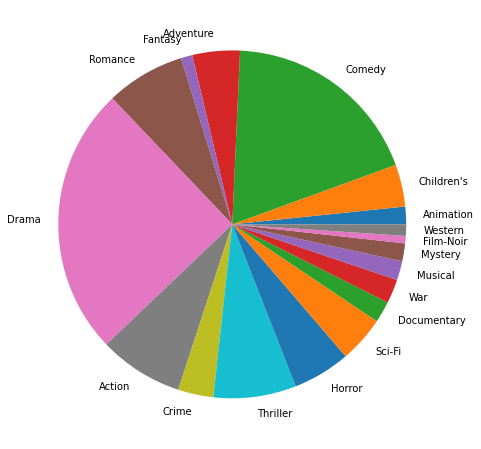

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(dummies.sum(), labels= dummies.columns)

Como observamos, la mayoría de películas son del género Drama y Comedia.

A continuación crearemos un heatmap para ver si existe algún tipo de correlación entre los géneros de las películas.

<AxesSubplot:>

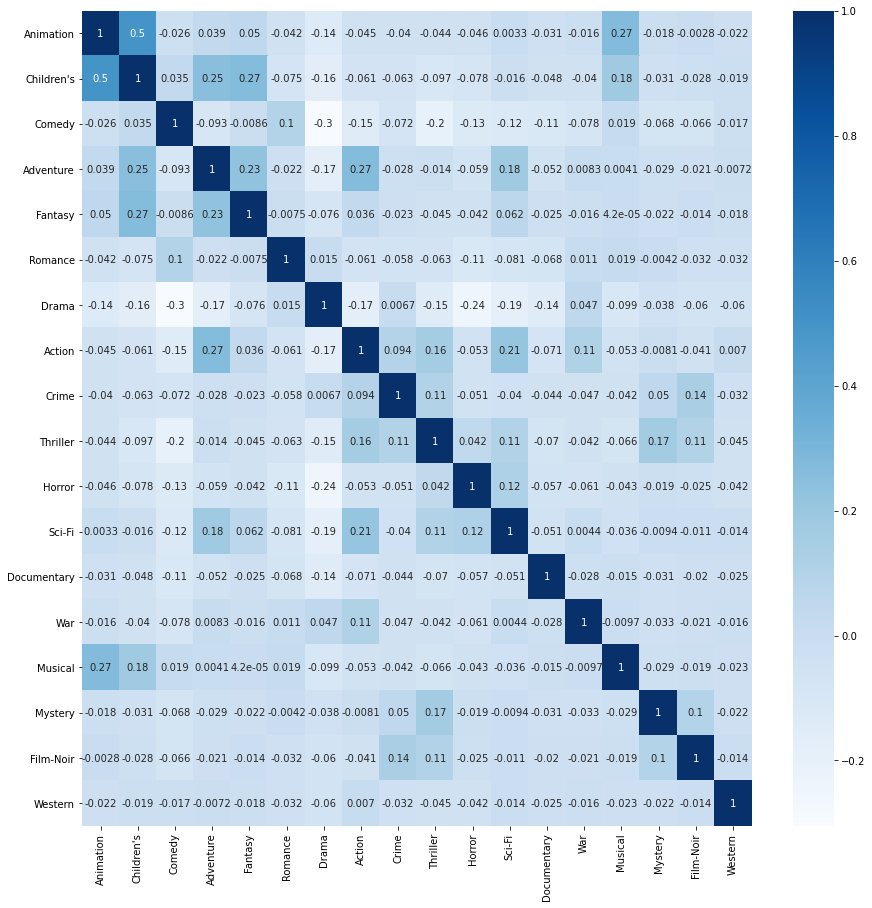

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(dummies.corr(), annot=True, cmap='Blues')

En principio, parece ser que no hay mucha correlación entre los diferentes géneros de película.

Sin embargo, hay una correlación que puede interesarnos entre Animation y Children's. Si lo pensamos bien, no parece casualidad que haya una correlación entre estos dos géneros, pues no sonaría raro que gran parte de las películas para niños suelen ser de animación. Aún así, no sabemos si el caso es que la mayoría de películas de niños son de animación o bien si la mayoría de películas de animación están hechas para niños. Para esto, nos fijaremos en cuál es la probabilidad de película de niño dado que es de animación y viceversa.

In [17]:
total_animation = dummies.sum()['Animation']
total_children = dummies.sum()["Children's"]
print(total_animation, total_children)

105.0 251.0


In [18]:
grupo_Anim = dummies.groupby(["Animation"]).sum() #hay 84 películas del género children's que son de animación
grupo_Anim

,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
Animation,,,,,,,,,,,,,,,,,
0.0,167.0,1175.0,269.0,62.0,467.0,1602.0,499.0,211.0,488.0,342.0,268.0,127.0,141.0,82.0,105.0,43.0,68.0
1.0,84.0,25.0,14.0,6.0,4.0,1.0,4.0,0.0,4.0,1.0,8.0,0.0,2.0,32.0,1.0,1.0,0.0


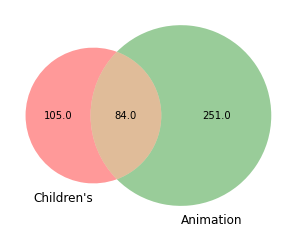

In [19]:
import matplotlib_venn as vplt

interseccion = grupo_Anim["Children's"][1]

vplt.venn2(subsets={'10': total_animation, "01": total_children, "11": interseccion}, set_labels={"Children's", "Animation"})

In [20]:
#probabilidad en porcentaje de animación dado para niños y de para niños dado animación.

animation_dado_child = (interseccion / total_children) * 100
child_dado_animation = (interseccion / total_animation) * 100
print(animation_dado_child)
print(child_dado_animation)

33.46613545816733
80.0


Como podemos observar, 84 de 105 pelis de animación son para niños, mientras que solo 84 de 251 pelis para niños son de animación. Es más probable, por tanto, que una película de animación sea también de niños (80%) a que una película de niños sea de animación (33,47%).

Ahora, analizaremos la distribución de las películas por decenios. Para ello, crearemos una columna de bins con base en la fecha.

In [21]:
movies_dummies.Date = movies_dummies.Date.astype('int64')
movies_dummies.Date.dtypes

dtype('int64')

In [22]:
movies_dummies.Date.max() #comprobando que no haya ningún error en la columna Date que creamos anteriormente antes de hacer la exploración.

2000

In [23]:
movies_dummies.Date.min()

1919

In [24]:
decenios = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]

movies_dummies['Decenios'] = pd.cut(movies_dummies.Date, decenios) #bins
movies_dummies.Decenios.unique()

[(1990, 2000], (1970, 1980], (1980, 1990], (1960, 1970], (1930, 1940], (1950, 1960], (1940, 1950], (1920, 1930], (1910, 1920]]
Categories (9, interval[int64]): [(1910, 1920] < (1920, 1930] < (1930, 1940] < (1940, 1950] ... (1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000]]

In [25]:
movies_dummies.Decenios = movies_dummies.Decenios.astype('category')
movies_dummies.Decenios.value_counts()

(1990, 2000]    2362
(1980, 1990]     634
(1970, 1980]     272
(1960, 1970]     192
(1950, 1960]     169
(1940, 1950]     121
(1930, 1940]      89
(1920, 1930]      39
(1910, 1920]       5
Name: Decenios, dtype: int64

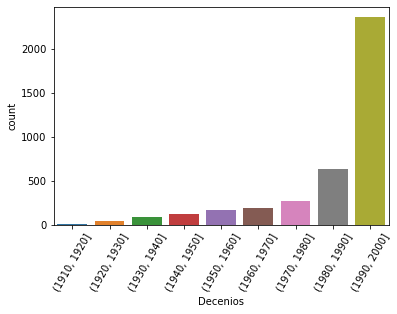

In [26]:
sns.countplot(x='Decenios', data=movies_dummies)

plt.xticks(rotation=60)
plt.show()

Podemos ver cómo la producción de películas ha crecido exponencialmente en los últimos años.

Visto esto, nuestro objetivo es relacionar los géneros cinematográficos en función de la década. Para ello, transformaremos el dataframe de formato wide a long para poder obtener una única columna para la variable género.

In [27]:
movies_dummies.head()

,Movie,Genre,Date,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western,Decenios
0,Toy Story,Animation|Children's|Comedy,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(1990, 2000]"
1,Jumanji,Adventure|Children's|Fantasy,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(1990, 2000]"
2,Grumpier Old Men,Comedy|Romance,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(1990, 2000]"
3,Waiting to Exhale,Comedy|Drama,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(1990, 2000]"
4,Father of the Bride Part II,Comedy,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(1990, 2000]"


In [28]:
prueba = pd.melt(movies_dummies, id_vars=['Movie', 'Genre', 'Date', 'Decenios'], var_name='Genre_')
generos_long_df = prueba.drop(prueba[prueba['value'] != 1].index)
generos_long_df

,Movie,Genre,Date,Decenios,Genre_,value
0,Toy Story,Animation|Children's|Comedy,1995,"(1990, 2000]",Genre_Animation,1.0
12,Balto,Animation|Children's,1995,"(1990, 2000]",Genre_Animation,1.0
47,Pocahontas,Animation|Children's|Musical|Romance,1995,"(1990, 2000]",Genre_Animation,1.0
236,"Goofy Movie, A",Animation|Children's|Comedy|Romance,1995,"(1990, 2000]",Genre_Animation,1.0
241,Gumby: The Movie,Animation|Children's,1995,"(1990, 2000]",Genre_Animation,1.0
...,...,...,...,...,...,...
69679,Lonely Are the Brave,Drama|Western,1962,"(1960, 1970]",Genre_Western,1.0
69734,Duel in the Sun,Western,1946,"(1940, 1950]",Genre_Western,1.0
69748,MacKenna's Gold,Western,1969,"(1960, 1970]",Genre_Western,1.0
69812,Shane,Drama|Western,1953,"(1950, 1960]",Genre_Western,1.0


In [29]:
dummies.sum()

Animation       105.0
Children's      251.0
Comedy         1200.0
Adventure       283.0
Fantasy          68.0
Romance         471.0
Drama          1603.0
Action          503.0
Crime           211.0
Thriller        492.0
Horror          343.0
Sci-Fi          276.0
Documentary     127.0
War             143.0
Musical         114.0
Mystery         106.0
Film-Noir        44.0
Western          68.0
dtype: float64

In [30]:
generos_long_df.Genre_.value_counts() #miramos que se haya realizado la transformación correctamente sin modificar el dato relacionado a los géneros

Genre_Drama          1603
Genre_Comedy         1200
Genre_Action          503
Genre_Thriller        492
Genre_Romance         471
Genre_Horror          343
Genre_Adventure       283
Genre_Sci-Fi          276
Genre_Children's      251
Genre_Crime           211
Genre_War             143
Genre_Documentary     127
Genre_Musical         114
Genre_Mystery         106
Genre_Animation       105
Genre_Fantasy          68
Genre_Western          68
Genre_Film-Noir        44
Name: Genre_, dtype: int64

Ahora que ya tenemos nuestro data set en formato long, podemos relacionar la columna Genre_ con la columna Decenios.

In [31]:
generos_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6408 entries, 0 to 69814
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Movie     6408 non-null   object  
 1   Genre     6408 non-null   object  
 2   Date      6408 non-null   int64   
 3   Decenios  6408 non-null   category
 4   Genre_    6408 non-null   object  
 5   value     6408 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 307.1+ KB


In [32]:
generos_long_df.Genre_ = generos_long_df.Genre_.astype('category')
generos_long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6408 entries, 0 to 69814
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Movie     6408 non-null   object  
 1   Genre     6408 non-null   object  
 2   Date      6408 non-null   int64   
 3   Decenios  6408 non-null   category
 4   Genre_    6408 non-null   category
 5   value     6408 non-null   float64 
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 264.0+ KB


Ahora que tenemos nuestra columna, pivotearemos el data frame con el objetivo de obtener una tabla en la que aparezca el número de películas por género y década. Finalmente, utilizaremos un heatmap para representarla de forma más intuitiva.

<AxesSubplot:xlabel='Decenios', ylabel='Genre_'>

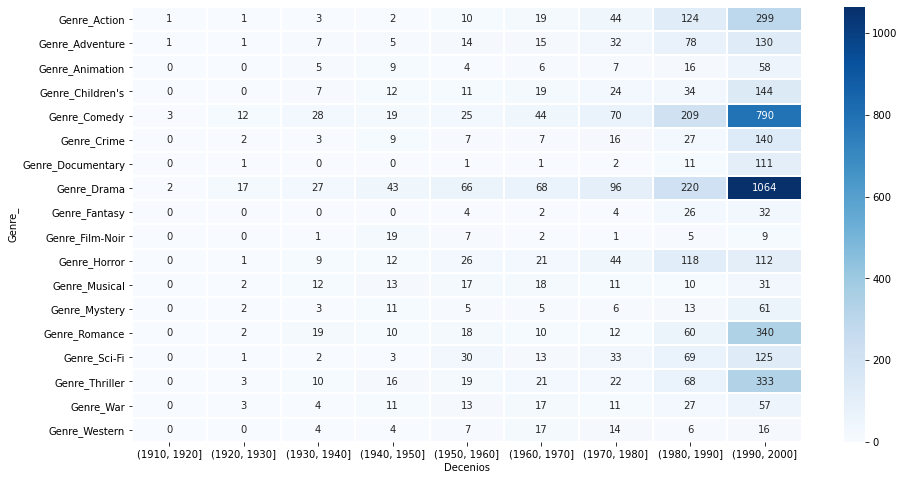

In [33]:

group = generos_long_df.groupby(['Genre_', 'Decenios']).count()
pivot = group.pivot_table(index='Genre_', columns='Decenios', values='value') 

pivot.fillna(0, inplace=True)
pivot = pivot.astype('int64')


plt.figure(figsize=(15,8))
sns.heatmap(pivot, cmap='Blues', linecolor='white', linewidth=1, annot=True, fmt='d')

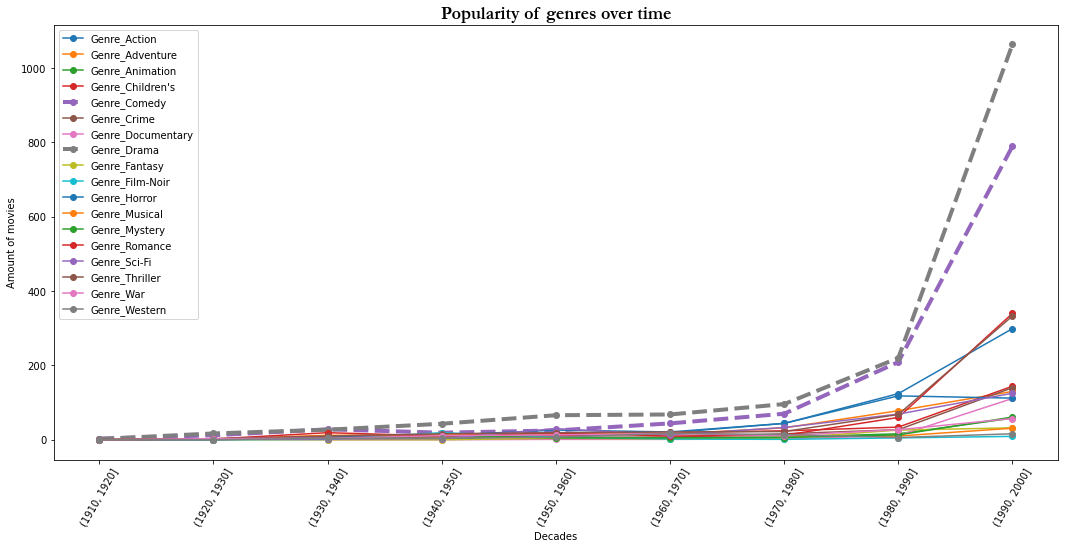

In [34]:
plt.figure(figsize=(18,8))
plt.title('Popularity of genres over time', fontdict={'family': 'Garamond', 'fontweight':'bold', 'fontsize': 18})

xpoints = pivot.columns.astype(str)
xpoints.tolist()

i=0
for genre in pivot.values:
    if i==4 or i==7:
        plt.plot(xpoints, genre, label=pivot.index[i], marker='o', linewidth = '4', ls='--')
    else:
        plt.plot(xpoints, genre, label=pivot.index[i], marker='o')
    i = i+1

plt.xticks(rotation=60)
plt.xlabel('Decades')
plt.ylabel('Amount of movies')
plt.legend()
plt.show()

Observamos que los géneros de drama y comedia han sido siempre los más populares, aunque es especialmente a partir de los 80s cuando comienzan a destacarse mucho respecto al resto de géneros. 

A continuación, hemos realizado un pequeño programa que permite cortar el data set para observar mejor los datos seleccionados.

A partir de qué fila realizar el split: 2
Hasta qué fila: 9
A partir de qué columna: 5
Hasta qué columna: 9


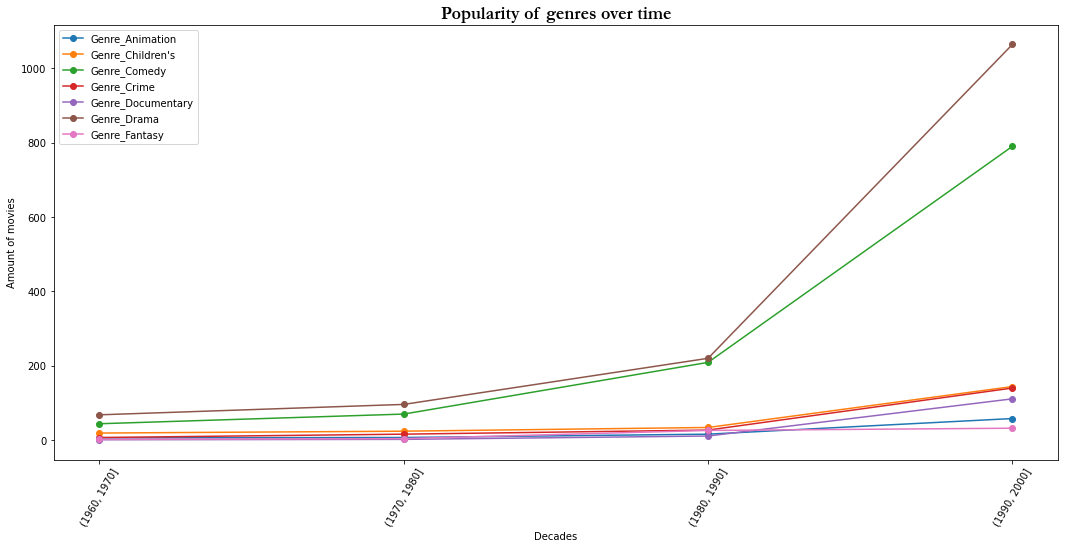

In [170]:
def plot_selection(df, from_fila, to_fila, from_columna, to_columna):
    special_selection = df.iloc[from_fila:to_fila, from_columna:to_columna]

    plt.figure(figsize=(18,8))
    plt.title('Popularity of genres over time', fontdict={'family': 'Garamond', 'fontweight':'bold', 'fontsize': 18})

    xpoints = special_selection.columns.astype(str)
    xpoints.tolist()

    i=0
    for genre in special_selection.values:
        plt.plot(xpoints, genre, label=special_selection.index[i], marker='o')
        i = i+1

    plt.xticks(rotation=60)
    plt.xlabel('Decades')
    plt.ylabel('Amount of movies')
    plt.legend()
    plt.show()

f1 = int(input('A partir de qué fila realizar el split: '))
f2 = int(input('Hasta qué fila: '))
c1 = int(input('A partir de qué columna: '))
c2 = int(input('Hasta qué columna: '))
plot_selection(pivot, f1, f2, c1, c2)